#**INTRODUCTION**

### **Heart Disease Prediction Based on Research Data**
This project aims to develop models that predict whether an individual is at risk of having a heart disease using the different features from a health research dataset. The type of Machine learning task I will engage with  is a classification task.

In this project, I will be performing data inspection, Exploratory Data Analysis, data preprocessing, feature engineering, model development, hyperparameter tuning, and model evaluation.




# **1. Import Libraries**

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier


# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV


# Evaluation
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             classification_report,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix,
                             roc_curve,
                             RocCurveDisplay,
                             auc
                             )
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, RFE
from sklearn.compose import ColumnTransformer

# Save Model
import joblib


#**2.	Data Importation**

In [ ]:
# Load Dataset
file = "/content/heart_disease_uci.csv"
df = pd.read_csv(file)

#**3.	Data Inspection**

In [ ]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.shape


(920, 16)

**Insight:**

The dataset has **920 rows** and **16 columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Insight:**

There are 8 **numeric data type** and 8 **object data type**

####**(a). Handling missing values**

In [ ]:
# Checking if there are missing values

df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Replacing null values in numerical Features with median value

cols_num = [
    'trestbps',
'chol',
'thalch',
'oldpeak',
'ca',
]


df[cols_num] = df[cols_num].fillna(df[cols_num].median())




In [ ]:
# Replacing null values in categorical Features with modal value

cols_cat = [ 'fbs',
            'restecg',
             'exang',
             'slope',
             'thal' ]


for col in cols_cat:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3891578291.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3891578291.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# confirming that there are no missing values

df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


####**(b). Dropping Irrelevant Features**

In [ ]:
df.head(15)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


#### On inspecting the first  rows in the dataset, the dataset has Features that are insignificant to the task to be achieved


*   dataset
*   id




In [ ]:
# Dropping Irrelevant Features

df.drop(['dataset','id'], axis=1, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0


####**(c).** Converting **object, boolean data type** to **categorical data type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    float64
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 88.2+ KB


In [ ]:
#Converting these columns to categorical data type

df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')


**Reasons for the conversion:**

i) To save memory (especially for this large datasets)

ii) To provide easier understanding and separation of variable types

iii) To make  analysis faster

iv) To prepare the data for preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    int64   
 1   sex       920 non-null    category
 2   cp        920 non-null    category
 3   trestbps  920 non-null    float64 
 4   chol      920 non-null    float64 
 5   fbs       920 non-null    category
 6   restecg   920 non-null    category
 7   thalch    920 non-null    float64 
 8   exang     920 non-null    category
 9   oldpeak   920 non-null    float64 
 10  slope     920 non-null    category
 11  ca        920 non-null    float64 
 12  thal      920 non-null    category
 13  num       920 non-null    int64   
dtypes: category(7), float64(5), int64(2)
memory usage: 57.6 KB


###**(d) Handling Duplicates**

In [ ]:
# Checking if there are duplicates

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 2


###**(e). Finding unique items in the dataset**

In [ ]:
#  separating 'numeric' data types from 'non-numeric' data types in the dataset

df_catgorical = df.select_dtypes(exclude = ['number'])
df_num = df.select_dtypes(include = ['number'])

In [ ]:
# Finding the number of unique items in 'non-numeric' data types

df_catgorical.nunique()

,0
sex,2
cp,4
fbs,2
restecg,3
exang,2
slope,3
thal,3


In [ ]:
# Finding each unique items in the 'df_catgorical' dataset
# using for loop

for col in df_catgorical:
  print('Unique items in',str.upper(col),'Column',
          df[col].unique(),
          print('--' * 50))


----------------------------------------------------------------------------------------------------
Unique items in SEX Column ['Male', 'Female']
Categories (2, object): ['Female', 'Male'] None
----------------------------------------------------------------------------------------------------
Unique items in CP Column ['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina']
Categories (4, object): ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina'] None
----------------------------------------------------------------------------------------------------
Unique items in FBS Column [True, False]
Categories (2, bool): [False, True] None
----------------------------------------------------------------------------------------------------
Unique items in RESTECG Column ['lv hypertrophy', 'normal', 'st-t abnormality']
Categories (3, object): ['lv hypertrophy', 'normal', 'st-t abnormality'] None
---------------------------------------------------------------------

**Insight:**

There are no insignificant data

# **4. Feature Engineering**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    int64   
 1   sex       920 non-null    category
 2   cp        920 non-null    category
 3   trestbps  920 non-null    float64 
 4   chol      920 non-null    float64 
 5   fbs       920 non-null    category
 6   restecg   920 non-null    category
 7   thalch    920 non-null    float64 
 8   exang     920 non-null    category
 9   oldpeak   920 non-null    float64 
 10  slope     920 non-null    category
 11  ca        920 non-null    float64 
 12  thal      920 non-null    category
 13  num       920 non-null    int64   
dtypes: category(7), float64(5), int64(2)
memory usage: 57.6 KB


###**(a). Creating a new column, 'age_range',  from 'age' column via feature binning**


In [ ]:
# Creating new labels for the age column
labels = ['10-20','21-30','31-40',
          '41-50','51-60', '61-70',
          '71-80', '81-90', '91-100']

# Creating the bins for the labels
bins = [10,20,30,40,50,60,70,80,90,100]

# Creating the 'age_range' column
df["age_range"] = pd.cut(df["age"], bins = bins, labels =labels)


In [ ]:
df["age_range"].unique()

['61-70', '31-40', '41-50', '51-60', '71-80', '21-30']
Categories (9, object): ['10-20' < '21-30' < '31-40' < '41-50' ... '61-70' < '71-80' < '81-90' < '91-100']

###**Reasons for the feature binning:**
  
i) To make computation and analysis better and faster  

ii) To provide easier and better understanding and appreciation of the dataset

iii) To prepare the data for preprocessing

#**5. Exploratory Data Analysis**

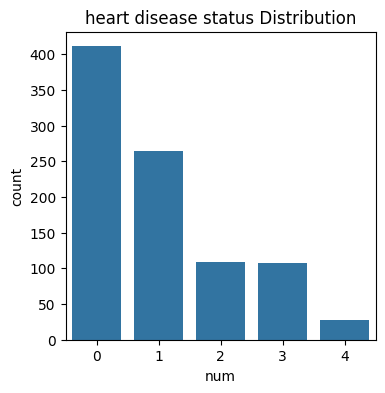

In [ ]:
# Heart disease status Distribution

# Determimning the size of the bar chart
fig, ax = plt.subplots(figsize=(4, 4))

# Creating the bar chart
sns.countplot(x='num', data=df)
plt.title('heart disease status Distribution')
plt.show()

**Insight:**

There are, significantly and approximately same number of people having heart diseases(1,2,3,4) as those not having heart disease .

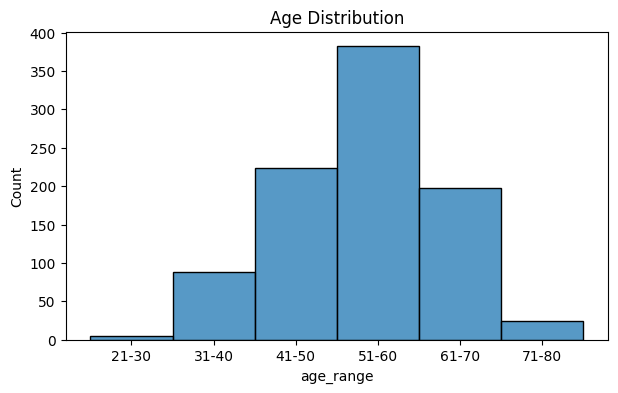

In [ ]:
# Age Distribution

# Determimning the size of the Histogram
fig, ax = plt.subplots(figsize=(7, 4))

# Creating the Histogram
sns.histplot(df['age_range'], bins=30, kde=False)
plt.title('Age Distribution')
plt.show()

**Insight:**

i). The age range with the highest number of people is '51 - 60', followed by '41 - 50', then '61 -70'.

ii). The age range with the lowest number of people is '21-30'.

iii). The dataset shows there are higher population of people within the age range of 51 years to 60 years in the region.


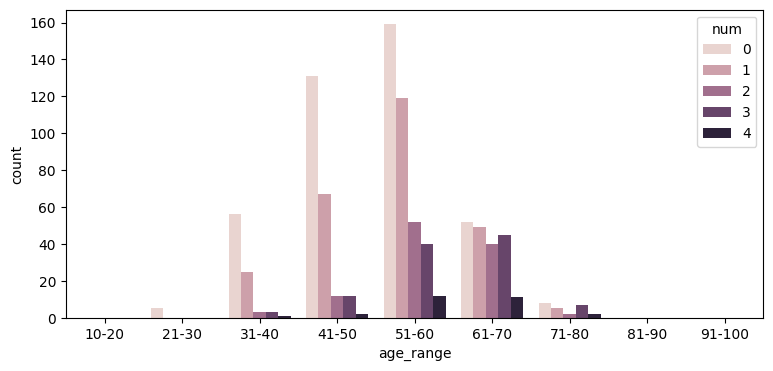

In [ ]:
# Heart disease status by Age Range

# Determimning the size of the clustered bar chart
fig, ax = plt.subplots(figsize=(9, 4))

# Creating the clustered bar chart
sns.countplot(data=df, x='age_range', hue='num')
plt.xticks(rotation=0)
plt.show()

**Insight:**

i). The age range with the **highest** number of people having heart disease is 51-60.

ii). The age range with the **lowest** number of people having heart disease is 21-30.

iii). Generally as age increases from 20 to 60, the number of people having heart disease increases drastically.

iv). Generally as age increases from 70 to 80, the number of people without heart disease maintains a very high frequency. This could be as a result of insufficient sample collection of people within that age range in the population

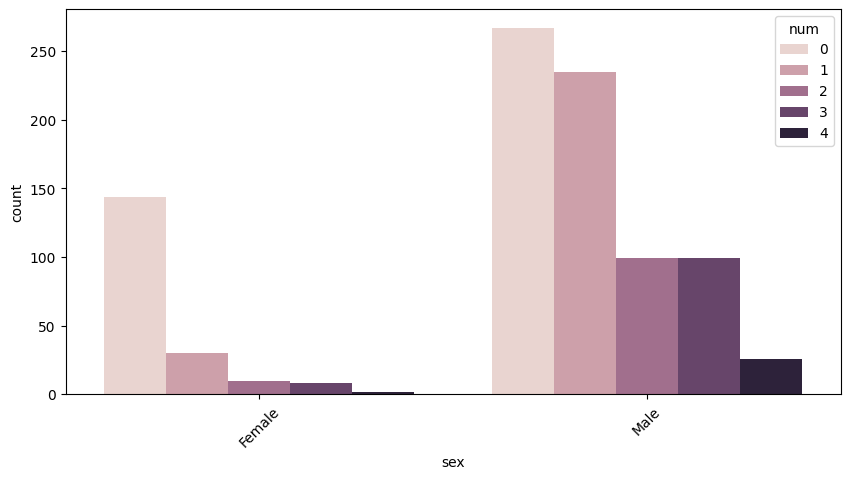

In [ ]:
# heart disease status by sex

# Determimning the size of the clustered bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Creating the clustered bar chart
sns.countplot(data=df, x='sex', hue='num')
plt.xticks(rotation=45)
plt.show()

**Insight:**

i). Male tends to be at risk of heart disease more than female

ii). The data seems to capture more data on Male than Female wich might indicate inequality in access to health care facility




# **6.  Data Preprocessing**





####**(a).	Encoding Categorical Variables**

In [ ]:
# Using LabelEncoder() to encode the data for Model development
lab_enc = LabelEncoder()

# List of categorical columns to encode
df_catgorical = df.select_dtypes(include = ['object','category'])

# Apply Label Encoding to each categorical column via for loop
for col in df_catgorical:
    df[col] = lab_enc.fit_transform(df[col])

#### Correlation Heatmap

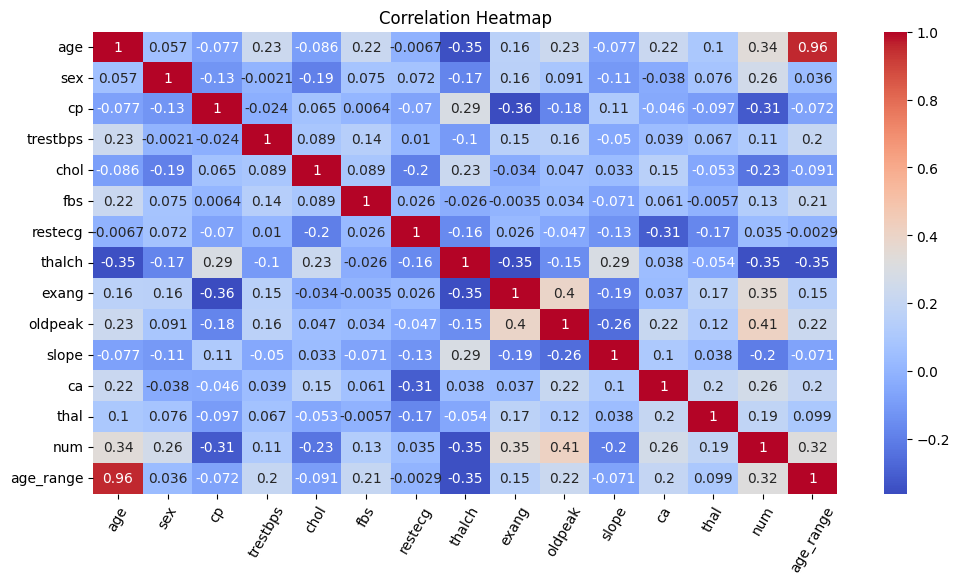

In [ ]:
# Correlation Heatmap

# Determimning the size of the Heatmap
fig, ax = plt.subplots(figsize=(12, 6))

# Creating the Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.xticks(rotation=60)
plt.show()

####**(b) feature and target separation**

In [ ]:
# Separating the Features from Target in the dataset

X = df.drop('num', axis=1)
y = df['num']

####**(c).	Feature Scaling**

In [ ]:
# Scaling the features using StandardScaler()

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


#**7.  Model Development**

####**(a). Train-Test Split**

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [ ]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


**Insight:**

The dataset is imbalanced

***Solution:***

  apply hyperparameter tuning like **'class weight': ['balance']** to some of the models to address this issue.

####**(b). Model Selection, Training, and evaluation**


###**(i). Logistic regression model**

In [ ]:
# Define the model
Log_Reg = LogisticRegression()


# Define the grid of hyperparameters
param_grid = {
    'max_iter' : [10,50,70,100,200,500,1000],
    'penalty' : ['l2'],
    'C' : [0.001,0.01,0.1,1,10,100],
    'random_state': [42],
    'class_weight': ['balanced'], #-To address imbalance in dataset
    'multi_class': ['multinomial'],
    'solver': ['lbfgs']

}




# Set up GridSearchCV
LogReg_grid_search = GridSearchCV(estimator=Log_Reg,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
LogReg_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", LogReg_grid_search.best_params_)
print("Best cross-validation F1-macro: ", LogReg_grid_search.best_score_)

Best parameters found:  {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Best cross-validation F1-macro:  0.35812831614174445


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:



# Predictions
Log_Reg_model = LogReg_grid_search.best_estimator_
logReg_y_pred = Log_Reg_model.predict(X_test)
logReg_y_pred_proba = Log_Reg_model.predict_proba(X_test)
logReg_y_pred

array([0, 0, 1, 4, 0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 3, 1, 0, 0,
       4, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 3, 3, 0, 2, 0,
       1, 0, 3, 4, 4, 0, 3, 0, 0, 0, 0, 2, 3, 0, 4, 1, 0, 0, 3, 3, 0, 4,
       0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4,
       0, 4, 0, 2, 0, 4, 0, 1, 0, 3, 0, 0, 3, 4, 1, 1, 0, 0, 0, 0, 4, 0,
       0, 4, 4, 0, 0, 0, 3, 0, 3, 0, 0, 1, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 2, 4, 1, 1, 1, 0, 1, 3, 2, 0, 0, 2, 2, 4, 0,
       0, 0, 0, 4, 4, 0, 3, 3, 0, 0, 0, 2, 0, 3, 0, 1, 1, 0, 0, 0, 0, 4,
       0, 2, 1, 0, 4, 1, 0, 2])

Accuracy: 0.4945652173913043
Precision: 0.36317733222597626
Recall: 0.443994301994302
F1 Score: 0.3379179079774909
ROC-AUC: 0.7439578681206263
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        75
           1       0.59      0.24      0.34        54
           2       0.18      0.08      0.11        25
           3       0.26      0.27      0.26        26
           4       0.13      0.75      0.22         4

    accuracy                           0.49       184
   macro avg       0.36      0.44      0.34       184
weighted avg       0.50      0.49      0.46       184



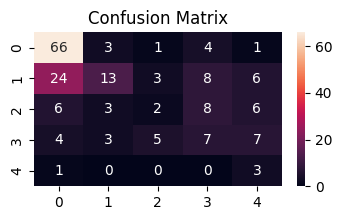

In [ ]:

# Evaluation Metrics For Logistic regression

print("Accuracy:", accuracy_score(y_test, logReg_y_pred))
print("Precision:", precision_score(y_test, logReg_y_pred, average='macro'))
print("Recall:", recall_score(y_test, logReg_y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, logReg_y_pred, average='macro'))
print("ROC-AUC:", roc_auc_score(y_test, logReg_y_pred_proba, average='macro', multi_class='ovr'))
print(classification_report(y_test, logReg_y_pred))

# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, logReg_y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()













###**(ii) K-Nearest Neighbours Model**

In [ ]:

# Define the model
knn = KNeighborsClassifier()


# Define the grid of hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7,9,11,13,15,17,19,21,23,
                    25,27,29,31,33,35,37,39,41,43],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],


}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='f1_macro')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation F1-macro: ", grid_search.best_score_)

Best parameters found:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best cross-validation F1-macro:  0.3410787905178158


In [ ]:
# Prediction

best_model = grid_search.best_estimator_
y_pred_knn = best_model.predict(X_test)
y_pred_proba_knn = best_model.predict_proba(X_test)
y_pred_knn

array([0, 0, 1, 2, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 3, 1, 0, 0, 1, 3, 0, 2,
       0, 0, 1, 4, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 1, 3,
       1, 3, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0,
       1, 1, 3, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 2, 1, 1, 0, 1, 0, 1, 4, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 3, 1, 0, 3, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 4, 0, 1, 1])

Accuracy: 0.5597826086956522
Precision: 0.3917384731670446
Recall: 0.38978347578347583
F1 Score: 0.38092432722490527
ROC-AUC: 0.7196228871795359
[[68  5  2  0  0]
 [21 26  1  5  1]
 [ 4 12  2  6  1]
 [ 5  9  5  6  1]
 [ 0  2  0  1  1]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.79        75
           1       0.48      0.48      0.48        54
           2       0.20      0.08      0.11        25
           3       0.33      0.23      0.27        26
           4       0.25      0.25      0.25         4

    accuracy                           0.56       184
   macro avg       0.39      0.39      0.38       184
weighted avg       0.50      0.56      0.52       184



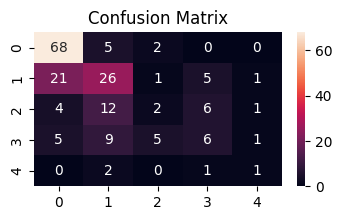

In [ ]:
# # Evaluation Metrics For K-Nearest Neighbours Model

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_knn, average='macro', multi_class='ovr'))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(iii) SVM Model**

In [ ]:
# Define the model
svm_clasf = svm.SVC(probability=True)


# Define the grid of hyperparameters
param_grid = {
    'C': [0.1, 1,3,5,10],
    'gamma': [0.1, 0.05,0.01],
    'kernel': ['linear', 'rbf','poly'],
    'degree': [1, 2,3,4,8],
    'class_weight': [None, 'balanced'],


}




# Set up GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm_clasf,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
svm_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", svm_grid_search.best_params_)
print("Best cross-validation F1-macro: ", svm_grid_search.best_score_)

Best parameters found:  {'C': 0.1, 'class_weight': 'balanced', 'degree': 1, 'gamma': 0.05, 'kernel': 'poly'}
Best cross-validation F1-macro:  0.3847111108172724


In [ ]:
# Make Predictions:

best_model_params = svm_grid_search.best_params_

# Create a new SVC instance with best parameters and explicitly ensure probability=True
best_model = svm.SVC(probability=True,
                     C=best_model_params['C'],
                     gamma=best_model_params['gamma'],
                     kernel=best_model_params['kernel'],
                     degree=best_model_params['degree'],
                     class_weight=best_model_params['class_weight'])

# Fit this new best_model on the training data
best_model.fit(X_train, y_train)

y_pred_SVM = best_model.predict(X_test)
# Get predicted probabilities for ROC-AUC
y_pred_proba_SVM = best_model.predict_proba(X_test)
y_pred_SVM

array([0, 0, 1, 4, 0, 0, 0, 3, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 3, 1, 0, 4,
       4, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 4, 3, 3, 0, 2, 0,
       1, 2, 3, 4, 1, 0, 4, 0, 0, 2, 0, 3, 3, 0, 4, 1, 0, 0, 3, 3, 0, 4,
       0, 0, 3, 0, 3, 0, 3, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 4, 3, 4,
       1, 4, 2, 2, 0, 4, 0, 1, 0, 3, 0, 0, 3, 4, 1, 1, 0, 0, 0, 0, 4, 0,
       1, 4, 4, 0, 0, 0, 3, 0, 1, 0, 4, 1, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 3, 3, 2, 4, 1, 2, 1, 0, 1, 3, 2, 0, 4, 2, 2, 4, 0,
       0, 0, 0, 3, 1, 0, 3, 3, 1, 0, 1, 2, 0, 3, 0, 1, 1, 0, 0, 0, 0, 3,
       0, 2, 1, 1, 4, 1, 0, 2])

Accuracy: 0.5163043478260869
Precision: 0.37159095255480795
Recall: 0.466945868945869
F1 Score: 0.37126401961845
ROC-AUC: 0.7864587251568264
              precision    recall  f1-score   support

           0       0.75      0.83      0.78        75
           1       0.56      0.37      0.44        54
           2       0.13      0.08      0.10        25
           3       0.29      0.31      0.30        26
           4       0.14      0.75      0.23         4

    accuracy                           0.52       184
   macro avg       0.37      0.47      0.37       184
weighted avg       0.53      0.52      0.51       184



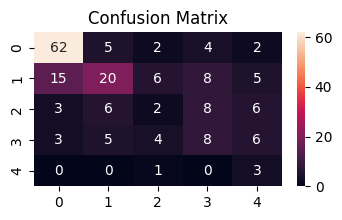

In [ ]:
# Evaluation Metrics For  SVM Model

print("Accuracy:", accuracy_score(y_test, y_pred_SVM))
print("Precision:", precision_score(y_test, y_pred_SVM, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_SVM, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_SVM, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_SVM, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_SVM, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(iv) Decision Tree Classifier Model**

In [ ]:
# Define the model
dt_clasf = DecisionTreeClassifier()


# Define the grid of hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 3, 5,7,9,10],
    'class_weight': ['balanced'], #-To address imbalance in dataset
    'max_features': ['sqrt', 'log2', None],


}




# Set up GridSearchCV
dt_clasf_grid_search = GridSearchCV(estimator=dt_clasf,
                                    param_grid=param_grid,
                                    cv=5,
                                    n_jobs=-1,
                                    scoring='f1_macro')

# Fit the model
dt_clasf_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", dt_clasf_grid_search.best_params_)
print("Best cross-validation F1-macro: ", dt_clasf_grid_search.best_score_)

Best parameters found:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 2}
Best cross-validation F1-macro:  0.35329097072613885


In [ ]:
# Make predictions
best_model = dt_clasf_grid_search.best_estimator_
y_pred_dt_clasf = best_model.predict(X_test)
y_pred_proba_dt_clasf = best_model.predict_proba(X_test)
y_pred_dt_clasf

array([0, 0, 1, 2, 0, 2, 0, 3, 3, 4, 4, 1, 1, 2, 3, 0, 0, 0, 4, 1, 0, 3,
       3, 4, 4, 3, 3, 0, 4, 0, 0, 2, 0, 3, 0, 3, 0, 0, 4, 4, 3, 0, 2, 4,
       0, 0, 3, 4, 4, 0, 0, 0, 1, 2, 0, 3, 2, 0, 3, 1, 0, 0, 3, 3, 0, 2,
       0, 0, 3, 0, 3, 4, 3, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 4, 4, 2, 3,
       4, 2, 0, 2, 0, 4, 3, 3, 4, 4, 0, 0, 3, 2, 1, 1, 0, 4, 2, 0, 3, 0,
       0, 2, 3, 3, 2, 0, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 2, 0, 3, 2, 0, 0,
       0, 0, 2, 0, 0, 3, 3, 0, 2, 1, 2, 3, 2, 1, 4, 4, 0, 4, 0, 2, 4, 0,
       0, 3, 1, 3, 4, 3, 3, 2, 1, 2, 0, 2, 0, 3, 1, 1, 3, 0, 1, 0, 0, 4,
       0, 0, 3, 0, 4, 3, 2, 4])

Accuracy: 0.44565217391304346
Precision: 0.36885731199995553
Recall: 0.37266666666666665
F1 Score: 0.33170788977705107
ROC-AUC: 0.6900296220483405
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        75
           1       0.53      0.17      0.25        54
           2       0.21      0.24      0.23        25
           3       0.32      0.50      0.39        26
           4       0.04      0.25      0.06         4

    accuracy                           0.45       184
   macro avg       0.37      0.37      0.33       184
weighted avg       0.53      0.45      0.46       184



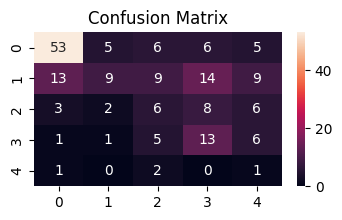

In [ ]:
# Evaluation Metrics For Decision Tree Classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_dt_clasf))
print("Precision:", precision_score(y_test, y_pred_dt_clasf, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_dt_clasf, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_dt_clasf, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_dt_clasf, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_dt_clasf, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_clasf), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(v) Random Forest Classifier Model**

In [ ]:

# Define the model
rfc = RandomForestClassifier()


# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [10,20,50],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced'], #-To address imbalance dataset

}


# Set up GridSearchCV
rfc_grid_search = GridSearchCV(estimator=rfc,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
rfc_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", rfc_grid_search.best_params_)
print("Best cross-validation F1-macro: ", rfc_grid_search.best_score_)

Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best cross-validation F1-macro:  0.40181136634321407


In [ ]:
# Make predictions on the test set
best_model = rfc_grid_search.best_estimator_
y_pred_rfc = best_model.predict(X_test)
y_pred_proba_rfc = best_model.predict_proba(X_test)
y_pred_rfc

array([0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0,
       3, 3, 2, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 1, 1, 4, 1, 0, 1, 0, 0, 0, 0, 3, 3, 0, 3, 1, 0, 0, 2, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 3, 1, 2,
       1, 3, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 3, 0,
       0, 3, 3, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 3, 1,
       0, 0, 0, 2, 1, 0, 3, 3, 1, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 4, 0, 0, 1])

Accuracy: 0.5489130434782609
Precision: 0.3605556847244827
Recall: 0.3563760683760684
F1 Score: 0.35426005132591964
ROC-AUC: 0.7832833543077445
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        75
           1       0.47      0.44      0.46        54
           2       0.35      0.24      0.29        25
           3       0.27      0.23      0.25        26
           4       0.00      0.00      0.00         4

    accuracy                           0.55       184
   macro avg       0.36      0.36      0.35       184
weighted avg       0.51      0.55      0.53       184



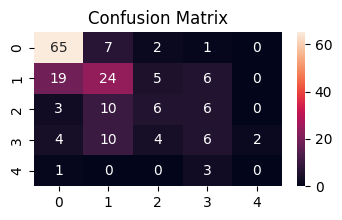

In [ ]:
# Evaluation Metrics For Decision Tree Classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rfc, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_rfc, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rfc, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_rfc, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


###**(vi) AdaBoost Classifier Model**

In [ ]:

# Define the model
ABClasf_ =  AdaBoostClassifier(estimator=DecisionTreeClassifier())


# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [10,20,50,100,150,200,300],
    'learning_rate': [0.01, 0.05,0.1, 0.5,1.0],
    'estimator__max_depth': [1, 2, 3, 4],


}


# Set up GridSearchCV
abc_grid_search = GridSearchCV(estimator=ABClasf_,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
abc_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", abc_grid_search.best_params_)
print("Best cross-validation F1-macro: ", abc_grid_search.best_score_)

Best parameters found:  {'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 150}
Best cross-validation F1-macro:  0.35366337070073883


In [ ]:





# Make predictions on the test set
best_model = abc_grid_search.best_estimator_
y_pred_abc = best_model.predict(X_test)
y_pred_proba_abc = best_model.predict_proba(X_test)
y_pred_abc

array([0, 0, 1, 1, 1, 0, 0, 3, 1, 0, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 3, 1, 0, 0, 3, 2, 0, 1,
       0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 1, 2,
       1, 3, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 3, 1, 0, 2, 1, 2, 2, 1,
       0, 0, 0, 1, 1, 0, 3, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 2, 0, 1, 1])

Accuracy: 0.5271739130434783
Precision: 0.34364944619613547
Recall: 0.33063247863247863
F1 Score: 0.32326340326340325
ROC-AUC: 0.7230527682136922
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        75
           1       0.38      0.44      0.41        54
           2       0.32      0.24      0.27        25
           3       0.33      0.12      0.17        26
           4       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.34      0.33      0.32       184
weighted avg       0.48      0.53      0.49       184



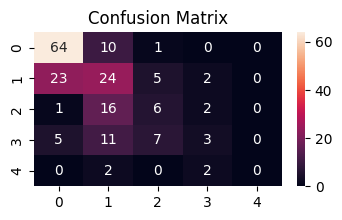

In [ ]:
# Evaluation Metrics For AdaBoost Classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_abc))
print("Precision:", precision_score(y_test, y_pred_abc, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_abc, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_abc, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_abc, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_abc, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_abc), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(vii) Gradient Boosting Classifier Model**

In [ ]:
# Define the model
GBClasf =  GradientBoostingClassifier()


# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [10,20,50,100,200,],
    'learning_rate': [0.01,0.05, 0.1, 1.0],
    'max_depth': [2,3,4, 5,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2'],





}


# Set up GridSearchCV
GBC_grid_search = GridSearchCV(estimator=GBClasf,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')

# Fit the model
GBC_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", GBC_grid_search.best_params_)
print("Best cross-validation F1-macro: ", GBC_grid_search.best_score_)

Best parameters found:  {'learning_rate': 1.0, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
Best cross-validation F1-macro:  0.3863247087754246


In [ ]:
# Make predictions on the test set
best_model = GBC_grid_search.best_estimator_
y_pred_GBC = best_model.predict(X_test)
y_pred_proba_GBC = best_model.predict_proba(X_test)
y_pred_GBC

array([0, 0, 4, 2, 1, 0, 0, 3, 4, 0, 0, 1, 3, 1, 3, 0, 0, 0, 2, 1, 0, 0,
       1, 1, 3, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 3, 0,
       0, 1, 1, 3, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 3, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 3,
       0, 2, 1, 3, 0, 4, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 4, 1, 0, 2, 0,
       0, 2, 3, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 3, 3, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 3, 1, 0, 0, 3, 1, 2, 0,
       0, 1, 1, 2, 1, 0, 3, 3, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2,
       0, 2, 2, 1, 4, 3, 0, 1])

Accuracy: 0.5271739130434783
Precision: 0.3511461794019934
Recall: 0.3411054131054131
F1 Score: 0.34235584140144054
ROC-AUC: 0.7361539767921096
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        75
           1       0.45      0.46      0.45        54
           2       0.25      0.16      0.20        25
           3       0.35      0.27      0.30        26
           4       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.35      0.34      0.34       184
weighted avg       0.50      0.53      0.51       184



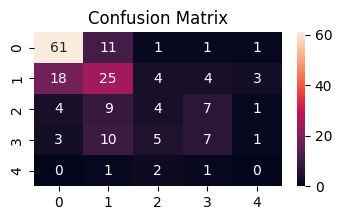

In [ ]:
# Evaluation Metrics For Gradient Boosting Classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_GBC))
print("Precision:", precision_score(y_test, y_pred_GBC, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_GBC, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_GBC, average='macro', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_GBC, average='macro', multi_class='ovr'))
print(classification_report(y_test, y_pred_GBC, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_GBC), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###**(viii) XGBoost classifier Model**

In [ ]:
# Define the model

xgb_model = xgb.XGBClassifier()


# Define the grid of hyperparameters
param_grid = {

    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.2],
    'max_depth': [3, 5, 6],
    'subsample': [0.5, 0.7, 0.9],
    'scale_pos_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'colsample_bytree': [0.7, 0.8, 1.0],



}


# Set up GridSearchCV
XGB_grid_search = GridSearchCV(estimator=xgb_model,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='f1_macro')


# Fit the model
XGB_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", XGB_grid_search.best_params_)
print("Best cross-validation F1-macro: ", XGB_grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.5}
Best cross-validation F1-macro:  0.37893854415115935


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:21:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Make predictions on the test set
best_model = XGB_grid_search.best_estimator_
y_pred_XGB = best_model.predict(X_test)
y_pred_proba_XGB = best_model.predict_proba(X_test)
y_pred_XGB

array([0, 0, 1, 4, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       3, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 1, 2, 4, 0, 0, 3, 0, 1, 1, 0, 3, 1, 0, 1, 1, 0, 0, 3, 3, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 2,
       0, 3, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0,
       1, 2, 3, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 3, 0, 2, 1, 0, 2, 0, 1, 3, 1, 0, 2, 2, 1, 4, 0,
       0, 0, 1, 3, 1, 0, 3, 3, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 4, 1, 0, 1])

Accuracy: 0.5597826086956522
Precision: 0.5330631916377685
Recall: 0.5597826086956522
F1 Score: 0.5363756675108147
ROC-AUC: 0.811764136522245
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        75
           1       0.45      0.46      0.46        54
           2       0.50      0.28      0.36        25
           3       0.35      0.23      0.28        26
           4       0.00      0.00      0.00         4

    accuracy                           0.56       184
   macro avg       0.40      0.37      0.37       184
weighted avg       0.53      0.56      0.54       184



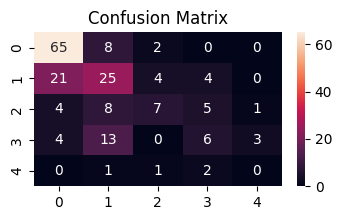

In [ ]:
# Evaluation Metrics For XGBoost classifier Model

print("Accuracy:", accuracy_score(y_test, y_pred_XGB))
print("Precision:", precision_score(y_test, y_pred_XGB, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_XGB, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_XGB, average='weighted', zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_XGB, average='weighted', multi_class='ovr'))
print(classification_report(y_test, y_pred_XGB, zero_division=0))


# Confusion Matrix

# Determimning the size of the plot
fig, ax = plt.subplots(figsize=(4, 2))

# Creating the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_XGB), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

##**8. Ploting ROC_AUC score and curve for all the Models**

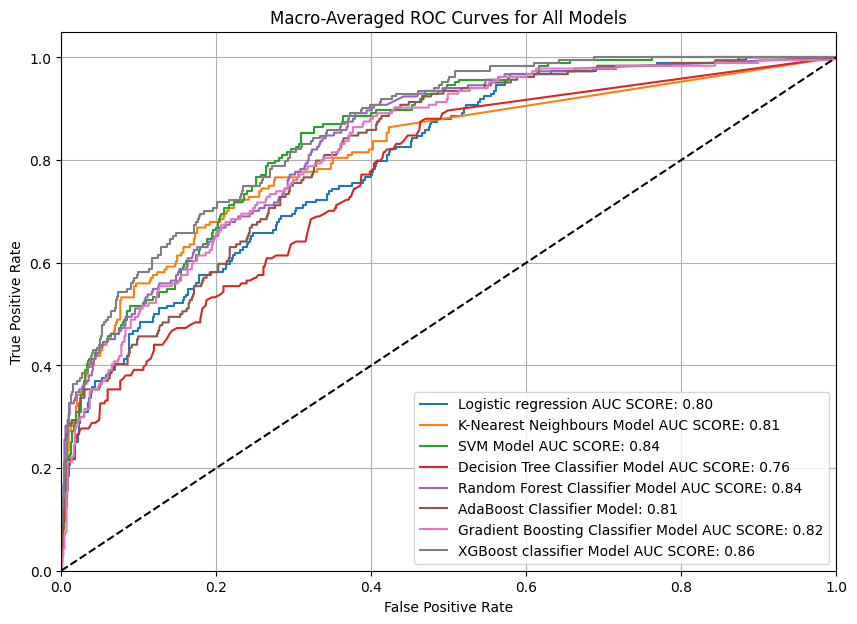

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize y_test for macro-average ROC
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# --- Calculate ROC curve and AUC for each model using macro-average ---

# Logistic Regression
fpr_Log, tpr_Log, _ = roc_curve(y_test_binarized.ravel(), logReg_y_pred_proba.ravel())
auc_Log = auc(fpr_Log, tpr_Log)

# K-Nearest Neighbours Model
fpr_KNN, tpr_KNN, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_knn.ravel())
auc_KNN = auc(fpr_KNN, tpr_KNN)

# SVM Model
fpr_SVM, tpr_SVM, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_SVM.ravel())
auc_SVM = auc(fpr_SVM, tpr_SVM)

# Decision Tree Classifier Model
fpr_DT_clasf, tpr_DT_clasf, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_dt_clasf.ravel())
auc_DT_clasf = auc(fpr_DT_clasf, tpr_DT_clasf)

# Random Forest Classifier Model
fpr_RFC, tpr_RFC, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_rfc.ravel())
auc_RFC = auc(fpr_RFC, tpr_RFC)

# AdaBoost Classifier Model
fpr_ABC, tpr_ABC, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_abc.ravel())
auc_ABC = auc(fpr_ABC, tpr_ABC)

# Gradient Boosting Classifier Model
fpr_GBC, tpr_GBC, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_GBC.ravel())
auc_GBC = auc(fpr_GBC, tpr_GBC)

# XGBoost classifier Model
fpr_XGB, tpr_XGB, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_XGB.ravel())
auc_XGB = auc(fpr_XGB, tpr_XGB)


# --- Plot the ROC_AUC curve ---
plt.figure(figsize=(10, 7)) # Adjust figure size for better readability
plt.plot(fpr_Log, tpr_Log, label=f"Logistic regression AUC SCORE: {auc_Log:.2f}")
plt.plot(fpr_KNN, tpr_KNN,  label=f"K-Nearest Neighbours Model AUC SCORE: {auc_KNN:.2f}")
plt.plot(fpr_SVM, tpr_SVM,  label=f"SVM Model AUC SCORE: {auc_SVM:.2f}")
plt.plot(fpr_DT_clasf, tpr_DT_clasf, label=f"Decision Tree Classifier Model AUC SCORE: {auc_DT_clasf:.2f}")
plt.plot(fpr_RFC, tpr_RFC,  label=f"Random Forest Classifier Model AUC SCORE: {auc_RFC:.2f}")
plt.plot(fpr_ABC, tpr_ABC,  label=f"AdaBoost Classifier Model: {auc_ABC:.2f}")
plt.plot(fpr_GBC, tpr_GBC, label=f"Gradient Boosting Classifier Model AUC SCORE: {auc_GBC:.2f}")
plt.plot(fpr_XGB, tpr_XGB,  label=f"XGBoost classifier Model AUC SCORE: {auc_XGB:.2f}")

plt.plot([0, 1], [0, 1], 'k--') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Macro-Averaged ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- The best models  (XGBoost Classifier  with tuned hyperparameters) had the highest ROC_AUC score, and achieved a good balance between precision and recall,  indicating better performance than other models

In [ ]:
# Saving the models

A_best_model = y_pred_rfc
joblib.dump(A_best_model, 'rfc_heart_disease_predictor_model.joblib')


B_best_model = y_pred_knn
joblib.dump(B_best_model, 'KNN_heart_disease_predictor_model.joblib')

C_best_model = y_pred_SVM
joblib.dump(C_best_model, 'SVM_heart_disease_predictor_model.joblib')

D_best_model = y_pred_XGB
joblib.dump(D_best_model, 'XGB_heart_disease_predictor_model.joblib')

['XGB_heart_disease_predictor_model.joblib']

## Summary:
**Data inspection and cleaning**
- Irrelevant column was dropped
- Rows with missing data and duplicates were removed
- Irrelevant data  was removed
- Relevant columns needing conversion were converted to categorical data type.

**Feature engineering**
- Feature binning was done on some features  for easier exploratory data analysis and better data preprocessing
-New features such as  'age_range' were created from existing features for better appreciation of the data.

**Exploratory Data Analysis**

- Male tends to be at risk of heart disease more than female
- The data seems to capture more data on Male than Female wich might indicate inequality in access to health care facility
- The age range with the **highest** number of people having heart disease is 51-60.

**Data preprocessing**
- Data was encoded for model training
- Features were scaled to ensure that all  features contribute equally to the model's learning process.

**Model training and evaluation**
- The best models  (Random Forest Classifier Model, XGBoost Classifier, K-Nearest Neeighbours, and SVM Model,  with tuned hyperparameters) had the highest ROC_AUC score, and achieved a good balance between precision and recall,  indicating better performance than other models


## Limitations:
- Higher number of estimators could not be applied in hyperparameter tuning due to insufficient and unavailable computational resources for model training
- Number of hyperparameters applied were reduced as well due to inefficient computational resources for model training
- A relatively small dataset which may affect learning process of the models




## Recommendations(for better acurracy and performance of the trained models):
- Access to efficient and proficient computational resources to have higher accurate-performing models ( training and evaluation).
- Collecting more granular and relevant data features like job role(sedentary life-style), industry sector( exposure to hazards), or location.
- Exploring deep learning for further improvement and development of more models.
- Availability of Data from Nigeria and Other African Health research centres and Hospitals to prevent Bias in model training
